# Eval runs

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr
import seaborn as sns
import re

pd.set_option('display.max_columns', None)

In [16]:
def process_and_plot(file_path, ylim, front_rr1, full_concat_rr1, with_pos=True):
    # Read the file
    with open(file_path, 'r') as file:
        data = file.readlines()

    results = []

    experiment_pattern = re.compile(r'Perform 1:N Evaluation on (\S+)')
    rr1_pattern = re.compile(r'RR1: ([\d\.]+)')
    concat_rr1_pattern = re.compile(r'Concat-RR1: ([\d\.]+)')

    current_experiment = None

    for line in data:
        exp_match = experiment_pattern.search(line)
        rr1_match = rr1_pattern.search(line)
        concat_rr1_match = concat_rr1_pattern.search(line)
        
        if exp_match:
            current_experiment = exp_match.group(1)
        
        if rr1_match and concat_rr1_match:
            rr1 = float(rr1_match.group(1))
            concat_rr1 = float(concat_rr1_match.group(1))
            results.append((current_experiment[12:], rr1, concat_rr1))

    experiments = [r[0] for r in results]
    rr1_values = [r[1] for r in results]
    concat_rr1_values = [r[2] for r in results]

    if with_pos:
        # Extract x, y coordinates from experiment names
        x_coords = []
        y_coords = []
        for exp in experiments:
            y, x = map(int, exp.split('_'))
            x_coords.append(x)
            y_coords.append(y)

        fig, ax = plt.subplots(figsize=(8, 6))
        sc = ax.scatter(x_coords, y_coords, c=concat_rr1_values, cmap='viridis', edgecolor='black', s=100)
        plt.colorbar(sc, label='Concat-RR1 Accuracy')
        ax.set_xlabel('Azimuth')
        ax.set_ylabel('Altitude')
        ax.set_title('Accuracy Distribution Based on Position')
        for i, txt in enumerate(concat_rr1_values):
            ax.text(x_coords[i], y_coords[i]+1.5, f'{txt:.2f}%', fontsize=8, ha='center', va='center', color='black')
        plt.grid(True)
        plt.show()

    x = np.arange(len(experiments))
    width = 0.4

    fig, ax = plt.subplots(figsize=(12, 6))
    ax.bar(x + width/2, concat_rr1_values, width, label='Concat-RR1', color='orange')
    ax.axhline(y=front_rr1, color='blue', linestyle='--', label='FRONT ONLY')
    ax.axhline(y=full_concat_rr1, color='green', linestyle='--', label='CONCAT 25 POSES')
    ax.set_ylabel('Scores')
    ax.set_title('')
    ax.set_xticks(x)
    ax.set_xticklabels(experiments, rotation=90)
    ax.set_ylim(ylim)
    ax.legend()

    plt.tight_layout()
    plt.show()

    fig, ax = plt.subplots(figsize=(12, 6))
    colors = ['blue' if len(exp) > 11 else 'red' for exp in experiments]
    ax.scatter(rr1_values, concat_rr1_values, color=colors, label='RR1')
    ax.axhline(y=front_rr1, color='blue', linestyle='--', label='FRONT ONLY')
    ax.axhline(y=full_concat_rr1, color='green', linestyle='--', label='CONCAT 25 POSES')

    for i, txt in enumerate(experiments):
        ax.annotate(txt, (rr1_values[i], concat_rr1_values[i]), fontsize=8, ha='right')

    ax.set_xlabel('RR1')
    ax.set_ylabel('Concat-RR1')
    ax.set_title('')
    ax.legend()

    plt.grid(True)
    plt.show()

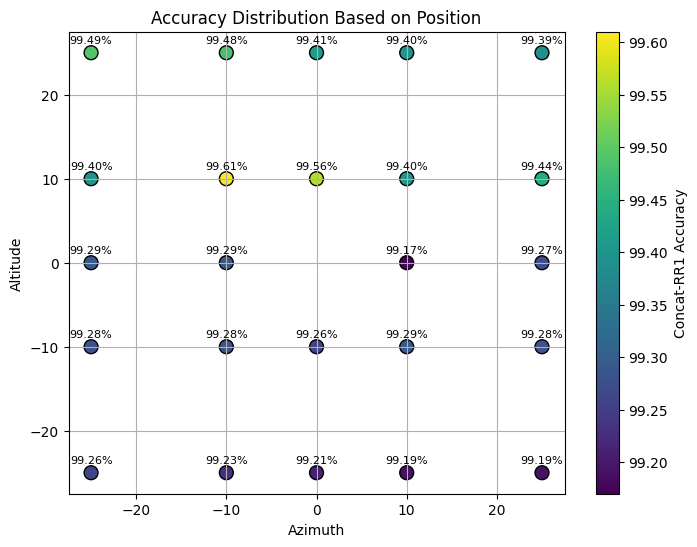

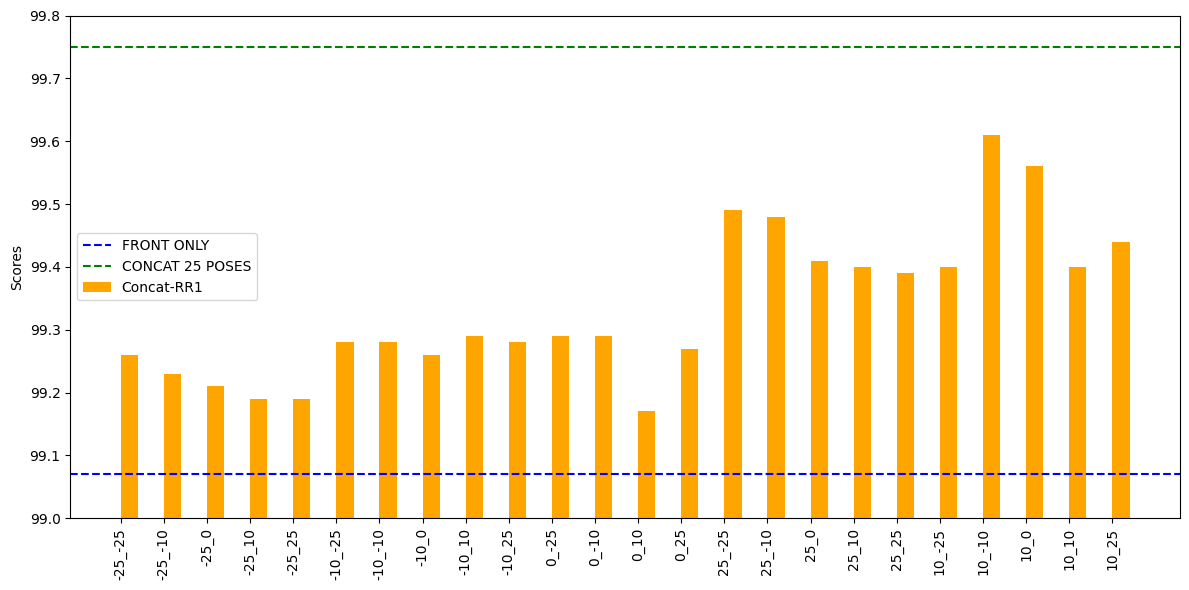

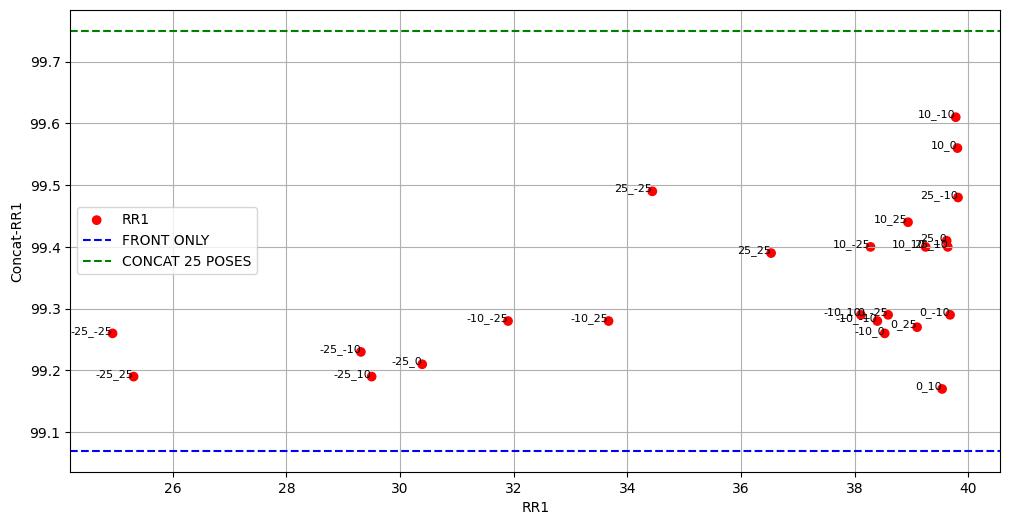

In [17]:
process_and_plot('F:\\Face\\HM_IDENT_3DFR\\src\\notebooks\\perspectives_ms1m.txt', ylim=(99, 99.8), front_rr1=99.07, full_concat_rr1=99.75)

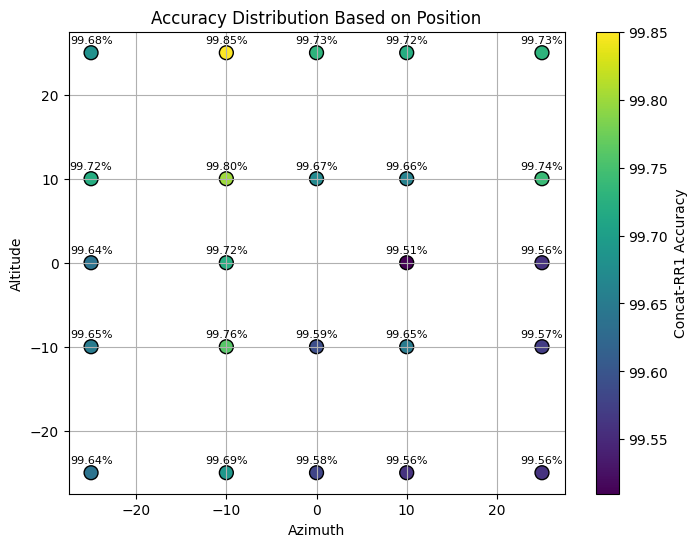

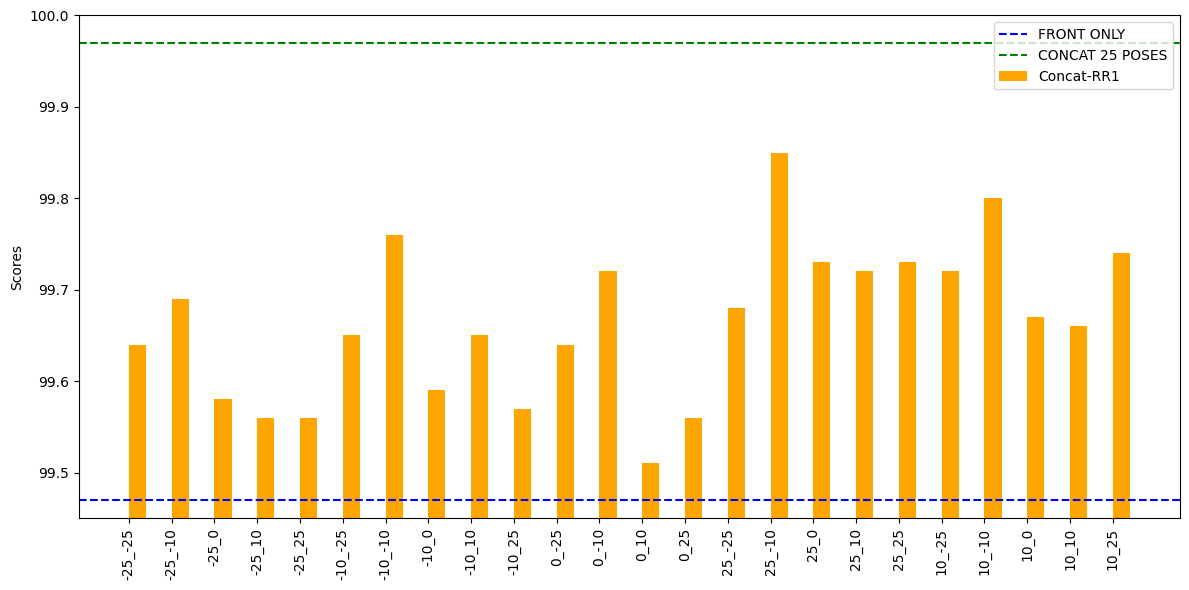

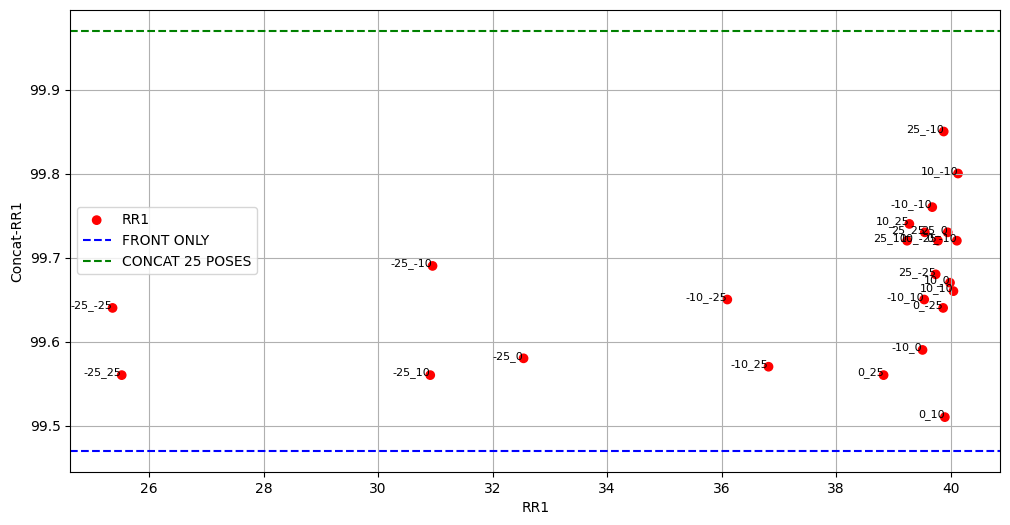

In [18]:
process_and_plot('F:\\Face\\HM_IDENT_3DFR\\src\\notebooks\\perspectives_asia.txt', ylim=(99.45, 100), front_rr1=99.47, full_concat_rr1=99.97)

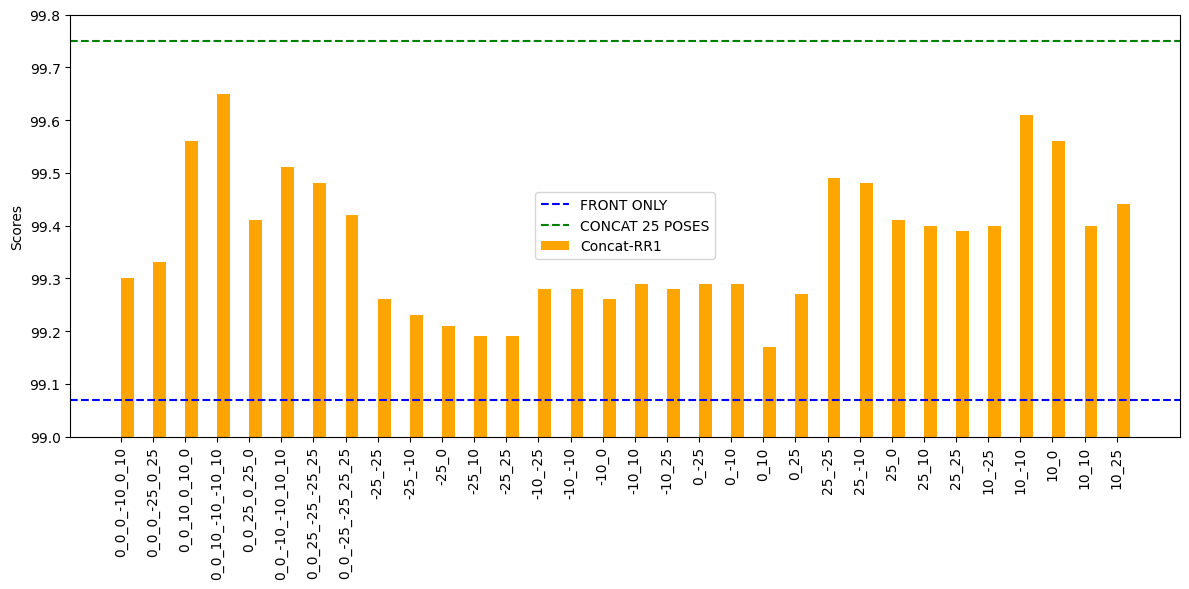

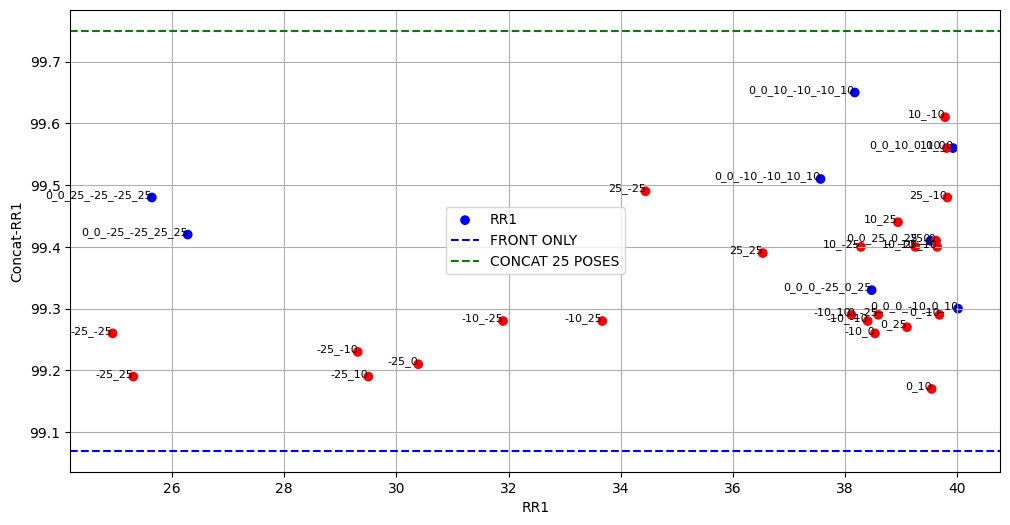

In [19]:
process_and_plot('F:\\Face\\HM_IDENT_3DFR\\src\\notebooks\\perspectives_ms1m_3.txt', ylim=(99, 99.8), front_rr1=99.07, full_concat_rr1=99.75, with_pos=False)

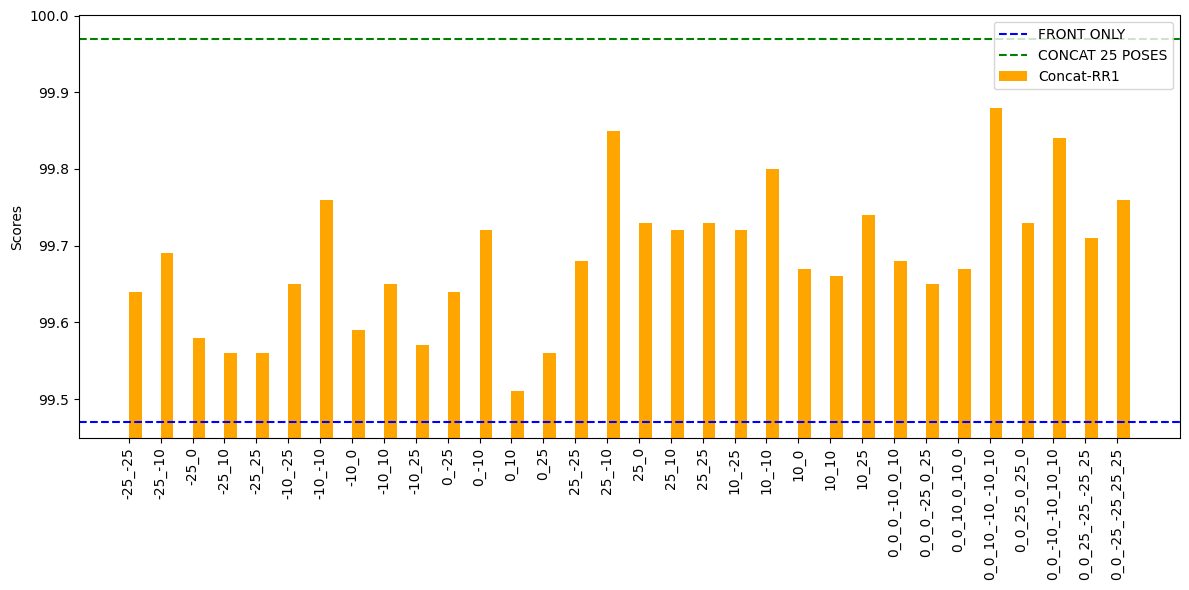

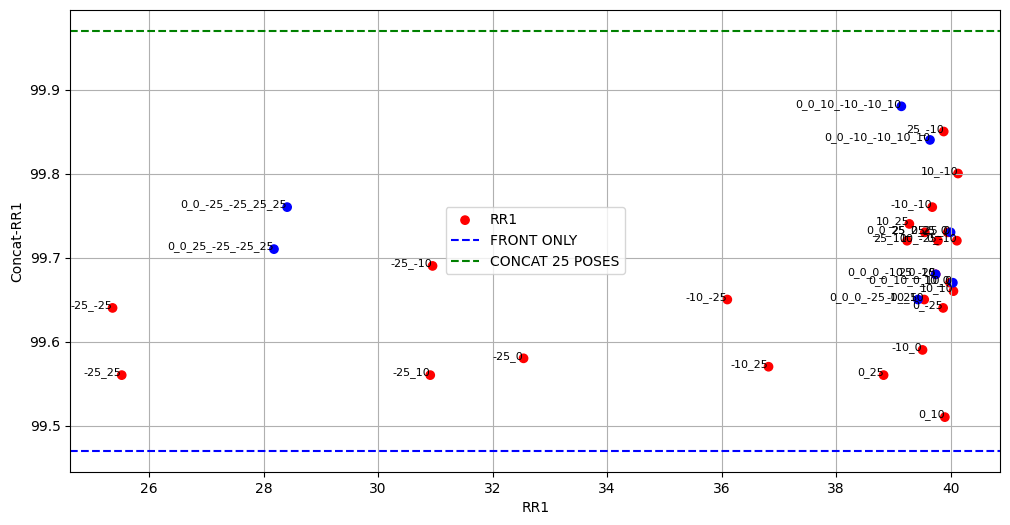

In [20]:
process_and_plot('F:\\Face\\HM_IDENT_3DFR\\src\\notebooks\\perspectives_asia_3.txt', ylim=(99.45, 100), front_rr1=99.47, full_concat_rr1=99.97, with_pos=False)

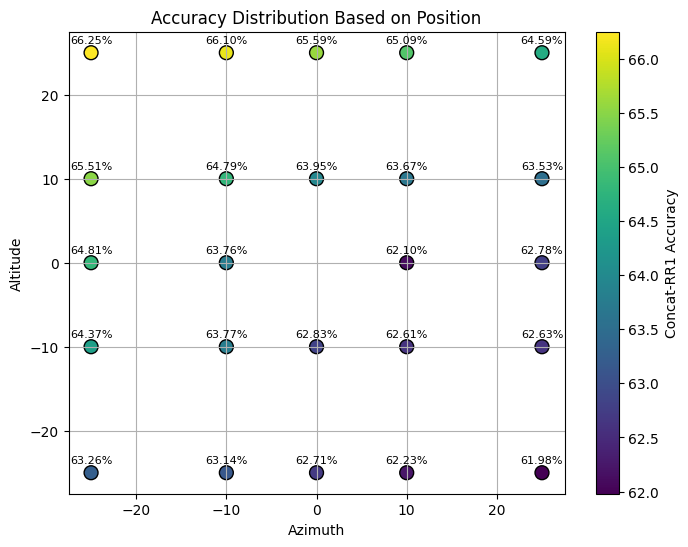

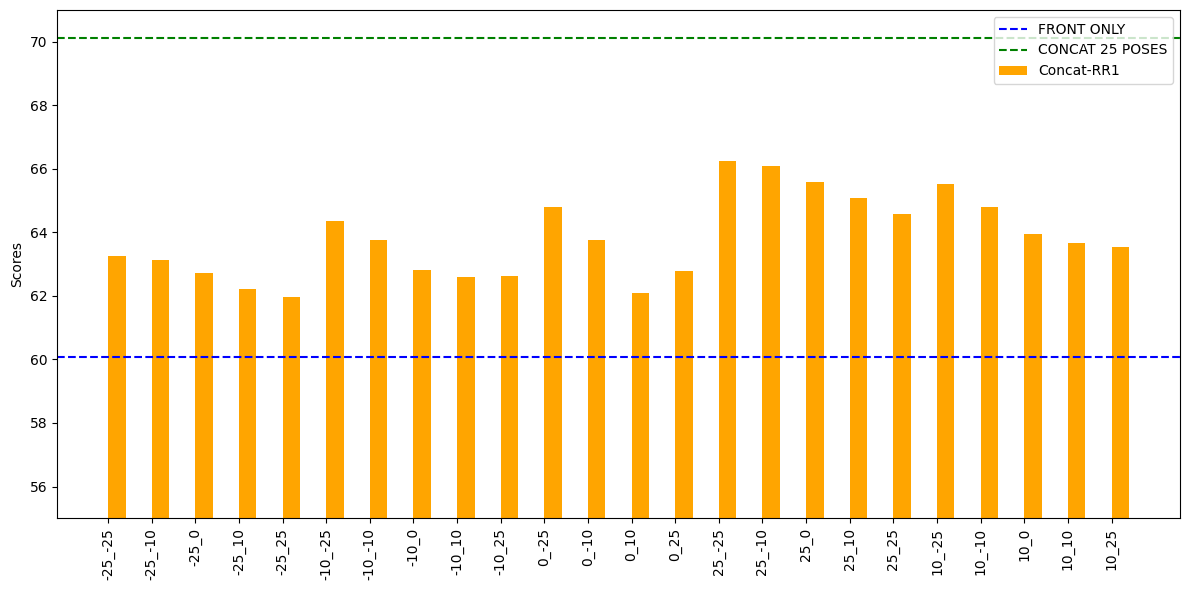

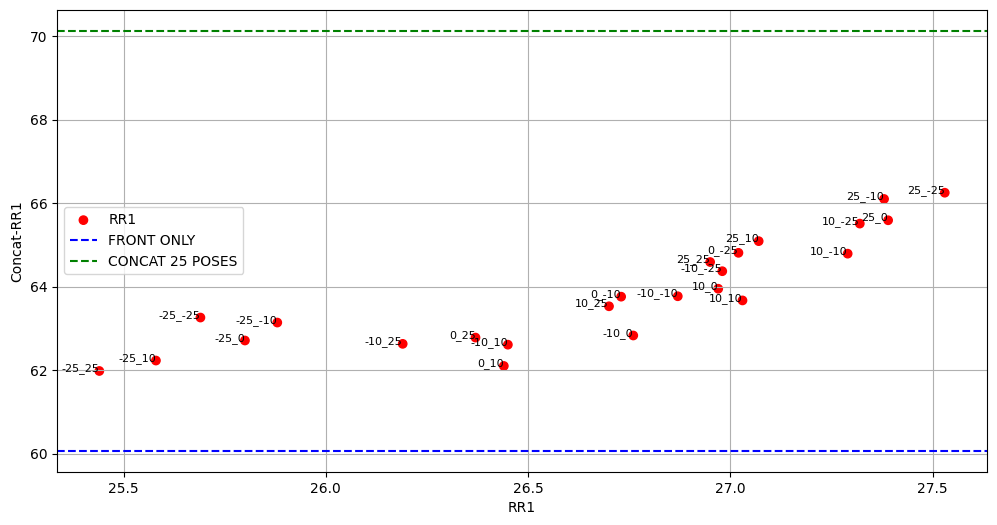

In [26]:
process_and_plot('F:\\Face\\HM_IDENT_3DFR\\src\\notebooks\\perspectives_ms1m_vox2train.txt', ylim=(55, 71), front_rr1=60.07, full_concat_rr1=70.13)

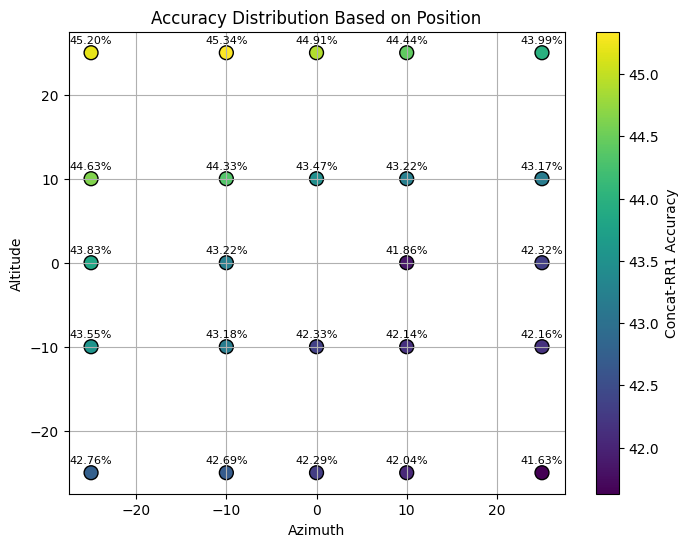

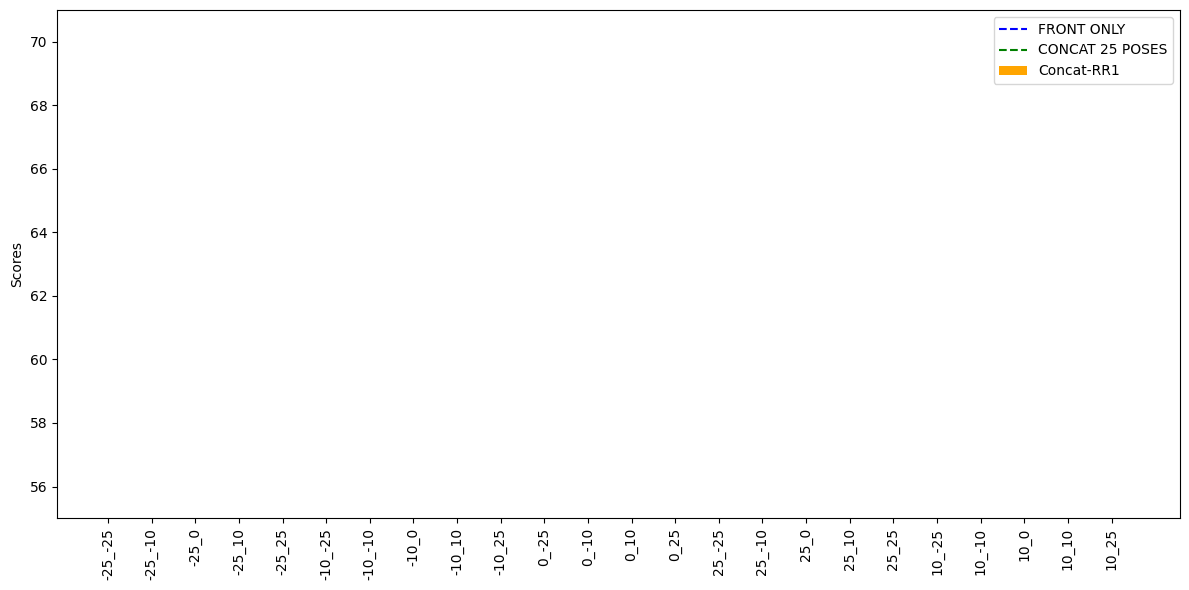

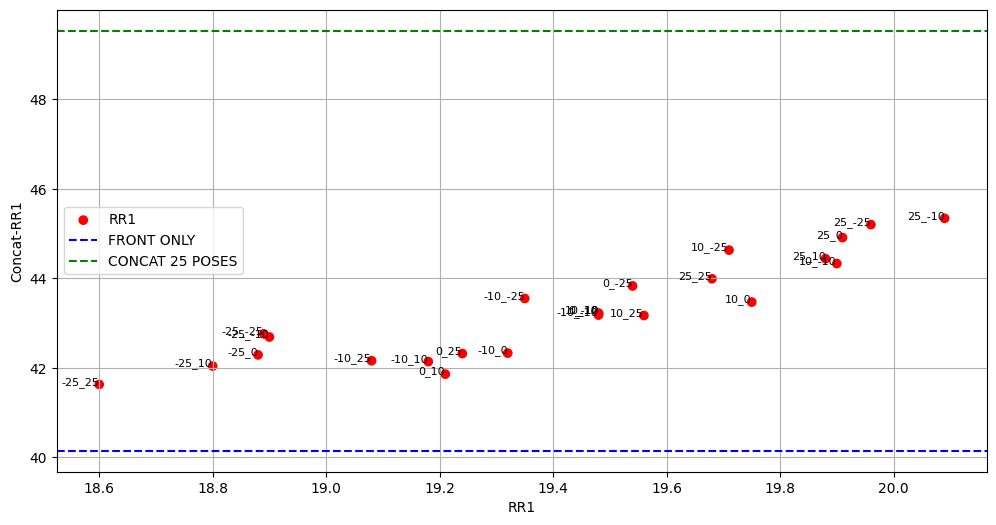

In [27]:
process_and_plot('F:\\Face\\HM_IDENT_3DFR\\src\\notebooks\\perspectives_asia_vox2train.txt', ylim=(55, 71), front_rr1=40.15, full_concat_rr1=49.53)

Dataset len: 411


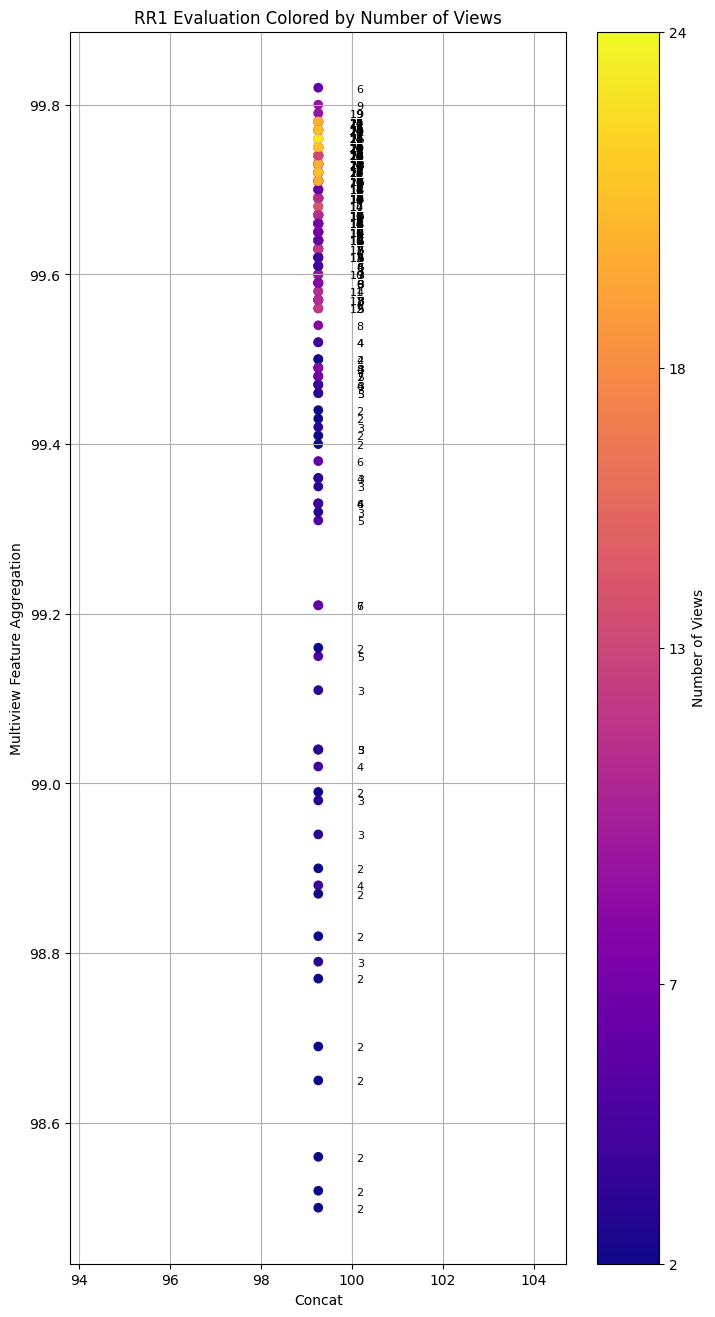

13 18
16 17
9 15
14 19
18 19
3 18
6 20
12 19
15 16
21 17
2 18
5 17
10 18
22 19
24 21
19 15
17 18
20 20
7 19
4 16
8 17
11 19
23 16


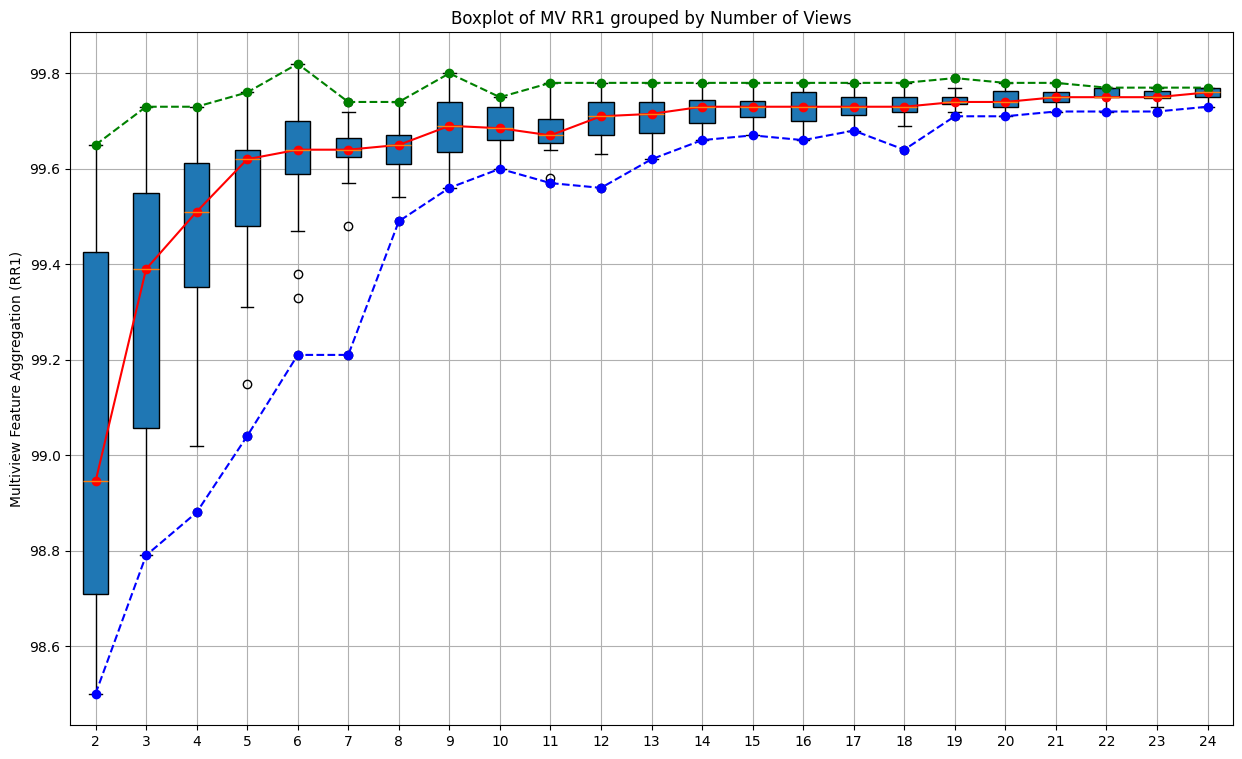

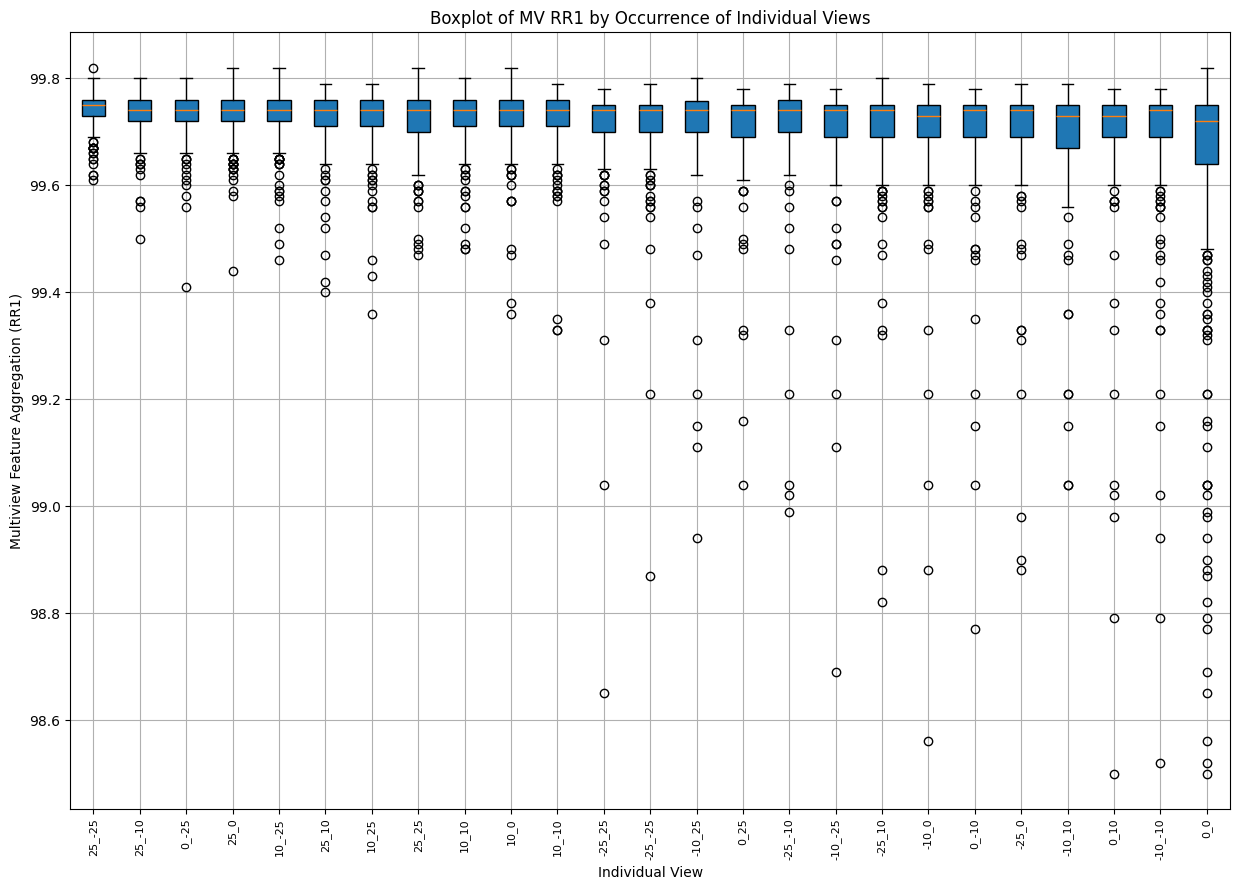

In [5]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import numpy as np
from collections import defaultdict

def process_and_plot2(file_path, ylim, front_rr1, full_concat_rr1, with_pos=True):

    with open(file_path, 'r') as file:
        data = file.readlines()

    results = []
    for line in data:

        if "Evaluation: Front-RR1:" in line:
            line = line.strip()
            dataset_part, eval_part = line.split(";")

            # Parse crop coordinates
            dataset_name, *coords_strs = dataset_part.split(":")[0].strip().split()

            parts = eval_part.split()
            front_rr1 = float(parts[2])
            concat_rr1 = float(parts[4])
            mv_rr1 = float(parts[6])

            results.append((coords_strs , front_rr1, concat_rr1, mv_rr1))

    print(f"Dataset len:", len(results))
    #for i in results:
        #print(i)

    coords_strs = [r[0] for r in results]
    front_rr1_values = [r[1] for r in results]
    concat_rr1_values = [r[2] for r in results]
    mv_rr1_values = [r[3] for r in results]

    # Lengths of coordinate strings
    lengths = [len(c) for c in coords_strs]
    min_len, max_len = min(lengths), max(lengths)
    norm = mcolors.Normalize(vmin=min_len, vmax=max_len)
    cmap = cm.plasma
    colors = [cmap(norm(l)) for l in lengths]

    fig, ax = plt.subplots(figsize=(8, 16))
    scatter = ax.scatter(concat_rr1_values, mv_rr1_values, c=lengths, cmap=cmap, norm=norm)

    # Colorbar with actual lengths
    cbar = plt.colorbar(scatter, ax=ax)
    cbar.set_label('Number of Views')
    tick_values = np.linspace(min_len, max_len, num=5, dtype=int)
    cbar.set_ticks(tick_values)
    cbar.set_ticklabels([str(v) for v in tick_values])

    for i, txt in enumerate(coords_strs):
        ax.annotate(len(txt), (concat_rr1_values[i]+1.0, mv_rr1_values[i]-0.005), fontsize=8, ha='right')

    ax.set_xlabel('Concat')
    ax.set_ylabel('Multiview Feature Aggregation')
    ax.set_title('RR1 Evaluation Colored by Number of Views')
    plt.grid(True)
    plt.show()


    # --------------------------------------
    grouped = defaultdict(list)
    for coord, mv_val in zip(coords_strs, mv_rr1_values):
        grouped[len(coord)].append(mv_val)

    for k,v in grouped.items():
        print(k, len(v))

    lengths_sorted = sorted(grouped.keys())
    data_for_boxplot = [grouped[l] for l in lengths_sorted]

    mins = [np.min(grouped[l]) for l in lengths_sorted]
    meds = [np.median(grouped[l]) for l in lengths_sorted]
    maxs = [np.max(grouped[l]) for l in lengths_sorted]
    x_vals = list(range(1, len(lengths_sorted) + 1))

    fig, ax = plt.subplots(figsize=(15, 9))
    ax.boxplot(data_for_boxplot, tick_labels=lengths_sorted, patch_artist=True)

    # Plot lines connecting min, median, and max
    ax.plot(x_vals, mins, label='Min', color='blue', linestyle='--', marker='o')
    ax.plot(x_vals, meds, label='Median', color='red', linestyle='-', marker='o')
    ax.plot(x_vals, maxs, label='Max', color='green', linestyle='--', marker='o')
    ax.set_ylabel('Multiview Feature Aggregation (RR1)')
    ax.set_title('Boxplot of MV RR1 grouped by Number of Views')
    ax.grid(True)
    plt.show()



    # ------------------------
    coord_bucket = defaultdict(list)
    for coords, mv_val in zip(coords_strs, mv_rr1_values):
        for coord in coords:
            coord_bucket[coord].append(mv_val)

    sorted_coords = sorted(coord_bucket.keys(), key=lambda k: np.mean(coord_bucket[k]), reverse=True)
    data_for_boxplot = [coord_bucket[coord] for coord in sorted_coords]

    fig, ax = plt.subplots(figsize=(max(12, len(sorted_coords)*0.5), 9))
    ax.boxplot(data_for_boxplot, patch_artist=True)
    ax.set_xticks(range(1, len(sorted_coords) + 1))
    ax.set_xticklabels(sorted_coords, rotation=90, fontsize=8)
    ax.set_xlabel('Individual View')
    ax.set_ylabel('Multiview Feature Aggregation (RR1)')
    ax.set_title('Boxplot of MV RR1 by Occurrence of Individual Views')
    ax.grid(True)
    plt.tight_layout()
    plt.show()


process_and_plot2('F:\\Face\\HM_IDENT_3DFR\\src\\notebooks\\perspectives_ms1m_bff.txt', ylim=(98, 100), front_rr1=40.15, full_concat_rr1=49.53)